# Transformer Applications 

## Sentiment analysis

In [1]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
print(classifier("I love transformers!"))

2025-07-23 16:47:11.306147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753289231.663824      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753289231.759756      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998069405555725}]


In [2]:
classifier("""
Robots will be a bigger product than the iPhone

And cost 10x as much

Tesla is the best stock to buy

""")

[{'label': 'POSITIVE', 'score': 0.9493611454963684}]

In [3]:
classifier("""
When I'm having a quiet day and people start assuming I'm sad or I'm mad at them
""")

[{'label': 'NEGATIVE', 'score': 0.994967520236969}]

## Named Entity Recognition (NER)

In [4]:
from transformers import pipeline
ner = pipeline("ner", grouped_entities=True)
print(ner("My name is Sarah and I live in Cairo."))

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'entity_group': 'PER', 'score': 0.9976714, 'word': 'Sarah', 'start': 11, 'end': 16}, {'entity_group': 'LOC', 'score': 0.9994382, 'word': 'Cairo', 'start': 31, 'end': 36}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [6]:
import pandas as pd

news = """
CNN
 — 
Ukraine has seen the first major anti-government protests since the start of Russia’s full-scale invasion over three years ago, as a move by President Volodymyr Zelensky to curb anti-corruption agencies sparked fury across the nation.

Defiant crowds gathered in the capital Kyiv on Tuesday, as well as Lviv in the west, with smaller groups gathering in Dnipro in the east and Odesa in the south, after Ukraine’s Parliament — the Verkhovna Rada — approved a bill that grants oversight of two key anti-corruption agencies to the prosecutor general, a politically appointed figure.

Critics say the move will hamper the two bodies, the National Anti-Corruption Bureau of Ukraine (NABU) and the Specialized Anti-Corruption Prosecutor’s Office (SAPO), and take Ukraine further away from its dream of joining the European Union. The EU has made it clear to Kyiv that it must implement strong anti-graft measures if it wants to become a member. The Biden administration urged the Ukrainian government to do more to root out corruption in 2023.

President Donald Trump delivers remarks while meeting with NATO Secretary General Mark Rutte in the Oval Office at the White House in Washington, DC, on Monday.

"""
pd.DataFrame(ner(news))

entity_group     score                                               word  \
0           ORG  0.990206                                                CNN   
1           LOC  0.999698                                            Ukraine   
2           LOC  0.999822                                             Russia   
3           PER  0.993643                                 Volodymyr Zelensky   
4           LOC  0.996504                                               Kyiv   
5           LOC  0.997288                                               Lviv   
6           LOC  0.935723                                             Dnipro   
7           LOC  0.965432                                              Odesa   
8           LOC  0.999810                                            Ukraine   
9           ORG  0.965192                                     Verkhovna Rada   
10          ORG  0.997024       National Anti - Corruption Bureau of Ukraine   
11          ORG  0.998877                                               NABU   
12          ORG  0.995352  Specialized Anti - Corruption Prosecutor ’ s O...   
13          ORG  0.990839                                               SAPO   
14          LOC  0.999665                                            Ukraine   
15          ORG  0.998794                                     European Union   
16          ORG  0.998678                                                 EU   
17          LOC  0.986530                                               Kyiv   
18          PER  0.986183                                              Biden   
19         MISC  0.999134                                          Ukrainian   
20          PER  0.999267                                       Donald Trump   
21          ORG  0.998377                                               NATO   
22          PER  0.996103                                         Mark Rutte   
23          LOC  0.909790                                        Oval Office   
24          LOC  0.995842                                        White House   
25          LOC  0.999071                                         Washington   
26          LOC  0.999292                                                 DC   

    start   end  
0       1     4  
1       9    16  
2      86    92  
3     160   178  
4     284   288  
5     312   316  
6     363   369  
7     386   391  
8     412   419  
9     439   453  
10    643   685  
11    687   691  
12    701   748  
13    750   754  
14    766   773  
15    817   831  
16    837   839  
17    861   865  
18    952   957  
19    983   992  
20   1058  1070  
21   1107  1111  
22   1130  1140  
23   1148  1159  
24   1167  1178  
25   1182  1192  
26   1194  1196

## Question answering

In [7]:
from transformers import pipeline
qa = pipeline("question-answering")
print(qa({
    "question": "Where do I live?",
    "context": "My name is Sarah and I live in London."
}))


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'score': 0.9736034870147705, 'start': 31, 'end': 37, 'answer': 'London'}


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:390: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


## Text Summarization

🔹 `do_sample=False`
* Deterministic decoding: the model uses greedy decoding or beam search.
* It always picks the most likely next word at each step.
* Result: same output every time for the same input.

🔹 `do_sample=True`
* Enables sampling-based decoding, like:
* Top-k sampling
* Top-p (nucleus) sampling
> Adds randomness to generation by sampling from the probability distribution of possible next tokens.
> Result: more diverse and creative outputs, but less deterministic.

-----------------------
For most summarization tasks, do_sample=False is preferred:

It produces clearer and more consistent summaries.

Good for tasks requiring factual consistency

In [8]:
from transformers import pipeline
summarizer = pipeline("summarization")
print(summarizer(news, max_length=20, min_length=5, do_sample=False))


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'summary_text': ' Ukraine has seen the first major anti-government protests since the start of Russia’'}]


## Sentence Similarity

In [13]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ["This is a test", "This is a trial"]
embeddings = model.encode(sentences)
print(util.pytorch_cos_sim(embeddings[0], embeddings[1]))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

tensor([[0.4629]])


## Image Classification

In [17]:
!wget "https://images.unsplash.com/photo-1753133829431-ef2cdb0d2e57?q=80&w=687&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" -O car.jpg

--2025-07-23 16:58:19--  https://images.unsplash.com/photo-1753133829431-ef2cdb0d2e57?q=80&w=687&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
Resolving images.unsplash.com (images.unsplash.com)... 151.101.194.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.194.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117644 (115K) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>] 114.89K  --.-KB/s    in 0.02s   

2025-07-23 16:58:19 (6.60 MB/s) - ‘car.jpg’ saved [117644/117644]



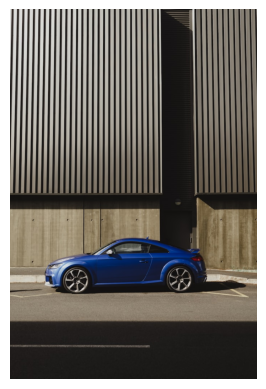

In [21]:
# reading the image
import matplotlib.pyplot as plt
import matplotlib.image as pimg
img = pimg.imread("/kaggle/working/car.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
from transformers import pipeline
image_classifier = pipeline("image-classification")
pd.DataFrame(image_classifier("/kaggle/working/car.jpg"))  

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


label     score
0                   window shade  0.422827
1  television, television system  0.242380
2                        monitor  0.060806
3     home theater, home theatre  0.060360
4                  window screen  0.036524

In [25]:
!wget -O cat.jpg "https://images.unsplash.com/photo-1533738363-b7f9aef128ce?q=80&w=735&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

--2025-07-23 17:02:33--  https://images.unsplash.com/photo-1533738363-b7f9aef128ce?q=80&w=735&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
Resolving images.unsplash.com (images.unsplash.com)... 151.101.130.208, 151.101.2.208, 151.101.66.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.130.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195357 (191K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 190.78K  --.-KB/s    in 0.03s   

2025-07-23 17:02:33 (7.11 MB/s) - ‘cat.jpg’ saved [195357/195357]



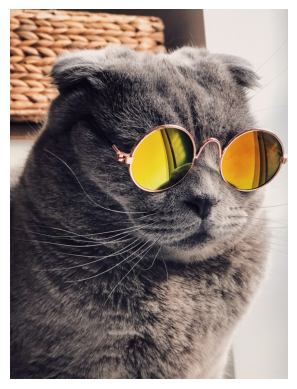

In [28]:
cat = plt.imread("/kaggle/working/cat.jpg")
plt.imshow(cat)
plt.axis("off")
plt.show()

In [26]:
pd.DataFrame(image_classifier("/kaggle/working/cat.jpg"))  

label     score
0  sunglasses, dark glasses, shades  0.673544
1                          sunglass  0.131811
2                  tabby, tabby cat  0.058416
3                         tiger cat  0.058218
4                      Egyptian cat  0.036230

## Image Captioning

In [32]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

# Load pre-trained BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Open the image from the path (assuming the image is local)
image_path = "/kaggle/working/cat.jpg"
image = Image.open(image_path)

# Process the image to be compatible with the model
inputs = processor(image, return_tensors="pt")

# Generate the caption for the image
out = model.generate(**inputs)

# Decode and print the generated caption
caption = processor.decode(out[0], skip_special_tokens=True)
print(caption)


a cat wearing sunglasses and looking up at the camera


## Visual Question Answering (VQA)


In [33]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

# Load pre-trained BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load the image (local file path example)
image_path = "/kaggle/working/cat.jpg"
image = Image.open(image_path)

# Define your question about the image
question = "What animal is in the image?"

# Prepare the inputs (image and question)
inputs = processor(image, question=question, return_tensors="pt")

# Generate the answer
out = model.generate(**inputs)

# Decode and print the answer
answer = processor.decode(out[0], skip_special_tokens=True)
print(answer)


Keyword argument `question` is not a valid argument for this processor and will be ignored.


a cat wearing sunglasses and looking up at the camera


## Code generation

In [34]:
from transformers import pipeline
generator = pipeline("text-generation", model="Salesforce/codegen-350M-mono")
print(generator("def fibonacci(n):", max_length=100, do_sample=True))

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/797M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/797M [00:00<?, ?B/s]

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

tokenizer_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "def fibonacci(n):\n  if n == 0:\n    num = []\n    num.append(1)\n    return num\n  elif n == 1:\n    return num\n  cur = 1\n  for i in range(2, n+1):\n    cur = cur+num[i-1]\n    num.append(cur)\n  return num\ndef main():\n  n = int(input())\n  arr = fibonacci(n)\n  print(arr)\nif __name__=='__main__':\n  main()\n"}]


## Image Generation

In [36]:
from diffusers import StableDiffusionPipeline
import torch

# Load the pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Generate image
prompt = "A futuristic city skyline at night in cyberpunk style"
image = pipe(prompt).images[0]

# Display or save the image
image.show()
image.save("cyberpunk_city.png")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpsn_1dckm.PNG'


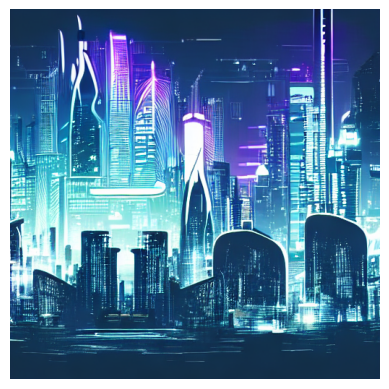

In [37]:
cyber = plt.imread("/kaggle/working/cyberpunk_city.png")
plt.imshow(cyber)
plt.axis("off")
plt.show()

## BERT model

In [38]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 3.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [39]:
from transformers import BertTokenizer, BertModel

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [40]:
tokenizer

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [41]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [42]:
print(model.encoder.layer[0])  # First encoder block
print(model.config)  # Model config like hidden size, layers, etc.

BertLayer(
  (attention): BertAttention(
    (self): BertSdpaSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): BertSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): BertIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): BertOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_pro

In [43]:
import torch

text = "Transformers are amazing!"
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# `last_hidden_state` gives embeddings for each token
# outputs.last_hidden_state: shape [batch_size, seq_len, hidden_size]
# For classification tasks, people often use: outputs.last_hidden_state[:, 0, :] 
# — the [CLS] token embedding.
print("Last hidden state shape:", outputs.last_hidden_state.shape)

Last hidden state shape: torch.Size([1, 6, 768])


In [44]:
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.1220,  0.0883,  0.1402,  ..., -0.2699,  0.3487,  0.0836],
         [ 1.5120,  0.0669, -0.2271,  ..., -0.6870,  0.7271,  0.1486],
         [ 0.5288,  0.2723,  0.1805,  ..., -0.4350,  0.5483, -0.0052],
         [ 0.7353,  0.3513, -0.4631,  ..., -0.7266,  0.3076, -0.6550],
         [-0.0383, -0.6582, -0.5449,  ...,  0.9175,  0.5790, -0.4320],
         [ 0.8342, -0.0045, -0.0415,  ...,  0.3027, -0.5258, -0.2700]]]), pooler_output=tensor([[-0.9018, -0.3286, -0.4840,  0.6195,  0.3139, -0.1194,  0.8518,  0.2641,
         -0.5449, -0.9999, -0.2093,  0.7829,  0.9783,  0.1897,  0.9397, -0.6253,
         -0.2921, -0.5860,  0.3295, -0.5469,  0.7079,  0.9995,  0.2582,  0.2927,
          0.4628,  0.8850, -0.7832,  0.9361,  0.9559,  0.7021, -0.6861,  0.2037,
         -0.9849, -0.2260, -0.5471, -0.9823,  0.3256, -0.7586,  0.1442,  0.0267,
         -0.9007,  0.1830,  0.9996, -0.3306,  0.0113, -0.3554, -1.0000,  0.1957,
        

In [58]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
inputs = tokenizer("I love transformers!", return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1)
    print("Predicted class:", prediction.item())

Predicted class: 0


In [61]:
# Load model and retrieve attention weights

from bertviz import head_view, model_view
from transformers import BertTokenizer, BertModel

model_version = 'bert-base-uncased'
model = BertModel.from_pretrained(model_version, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_version)
sentence_a = "The cat sat on the mat"
sentence_b = "The cat lay on the rug"
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt')
input_ids = inputs['input_ids']
token_type_ids = inputs['token_type_ids']
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
sentence_b_start = token_type_ids[0].tolist().index(1)
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list) 

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [62]:
head_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

1. `[CLS]` = Summary Token
* In BERT, the `[CLS]` token is prepended to every input.
* It is designed to aggregate information from the whole sequence.
* In tasks like classification (e.g., sentiment, intent), only the `[CLS]` token’s output is used by the final layer.
  
>💡 That’s why many heads learn to route important information into `[CLS]` — it’s like a “collector” or a “summary sponge.”
-----------------------
2. `[SEP]` = Segment Separator
* `[SEP]` separates sentences (for sentence pair tasks like NLI, QA).
* It marks boundaries — and BERT learns to pay attention to it to understand sentence structure and know when one sentence ends and another starts.
-----------------------



In [63]:
model_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>